In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [12]:
from keras.datasets import cifar10

In [13]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [14]:
print('Training data shape :', train_images.shape, train_labels.shape)
print('Testing data shape  :', test_images.shape, test_labels.shape)

Training data shape : (50000, 32, 32, 3) (50000, 1)
Testing data shape  : (10000, 32, 32, 3) (10000, 1)


In [15]:
# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


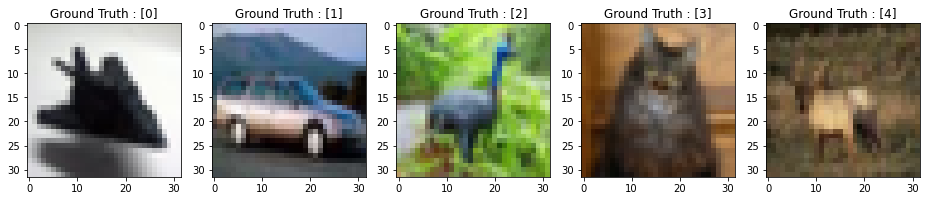

In [16]:
plt.figure(figsize=[16,8])

plt.subplot(1, 5, 1)
plt.imshow(train_images[29,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[29]))

plt.subplot(1, 5, 2)
plt.imshow(train_images[4,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[4]))

plt.subplot(1, 5, 3)
plt.imshow(train_images[6,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[6]))

plt.subplot(1, 5, 4)
plt.imshow(train_images[26,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[26]))

plt.subplot(1, 5, 5)
plt.imshow(train_images[3,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[3]));

Text(0.5, 1.0, 'Ground Truth : [9]')

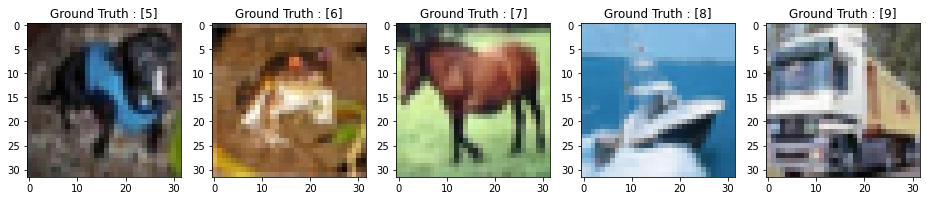

In [17]:
plt.figure(figsize=[16,8])

plt.subplot(1, 5, 1)
plt.imshow(train_images[27,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[27]))

plt.subplot(1, 5, 2)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

plt.subplot(1, 5, 3)
plt.imshow(train_images[7,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[7]))

plt.subplot(1, 5, 4)
plt.imshow(train_images[8,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[8]))

plt.subplot(1, 5, 5)
plt.imshow(train_images[1,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[1]))

Find the shape of input image then reshape it into input format for training and testing sets. After that change all datatypes into floats.

In [18]:
nRows, nCols, nDims = train_images.shape[1:]
nRows, nCols, nDims

(32, 32, 3)

In [19]:
train_images.shape

(50000, 32, 32, 3)

In [20]:
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
train_data = train_data.astype('float32')
print('train data shape :', train_data.shape)

test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
test_data = test_data.astype('float32')
print('test data shape  :', test_data.shape)

input_shape = (nRows, nCols, nDims)

train data shape : (50000, 32, 32, 3)
test data shape  : (10000, 32, 32, 3)


In [21]:
train_data = train_data / 255
test_data /= 255

In [22]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [23]:
print('Original label 0 :', train_labels[0])
print('After conversion to categorical (one-hot) :', train_labels_one_hot[0])

Original label 0 : [6]
After conversion to categorical (one-hot) : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [24]:
def createModel():
    
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    # 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    # 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    # 
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    # 

    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    
    # 
    
    model.add(Dense(nClasses, activation='softmax'))
    return model

In [25]:
model = createModel()

In [26]:
batch_size = 256
epochs = 50

In [27]:
model.compile(
    optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']
)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

In [ ]:
history = model.fit(
    train_data, train_labels_one_hot, batch_size=batch_size,
    epochs=epochs, verbose=1, validation_data=(test_data, test_labels_one_hot)
)

Epoch 1/50
196/196 [==============================] - 26s 128ms/step - loss: 1.7875 - accuracy: 0.3604 - val_loss: 1.6075 - val_accuracy: 0.4280
Epoch 2/50
196/196 [==============================] - 26s 133ms/step - loss: 1.3292 - accuracy: 0.5297 - val_loss: 1.2137 - val_accuracy: 0.5609
Epoch 3/50
196/196 [==============================] - 27s 140ms/step - loss: 1.1041 - accuracy: 0.6138 - val_loss: 1.1687 - val_accuracy: 0.5953
Epoch 4/50
196/196 [==============================] - 28s 141ms/step - loss: 0.9589 - accuracy: 0.6671 - val_loss: 1.2304 - val_accuracy: 0.5704
Epoch 5/50
196/196 [==============================] - 25s 125ms/step - loss: 0.8438 - accuracy: 0.7065 - val_loss: 0.9460 - val_accuracy: 0.6795
Epoch 6/50
196/196 [==============================] - 24s 124ms/step - loss: 0.7489 - accuracy: 0.7396 - val_loss: 1.0410 - val_accuracy: 0.6429
Epoch 7/50
196/196 [==============================] - 24s 123ms/step - loss: 0.6568 - accuracy: 0.7725 - val_loss: 0.9636 - val_ac

In [ ]:
model.evaluate(test_data, test_labels_one_hot)